In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.flush_and_unmount()

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
Graphtype = nx.DiGraph()
#reading transaction data
filepath = 'drive/MyDrive/BAJAJ/GNN_datasets/amazon0601.txt' 
G = nx.read_edgelist(
    filepath,
    comments='#',
     
    create_using=Graphtype,
    nodetype=int
)

In [ ]:
#reading metadata
df = pd.read_csv('drive/MyDrive/BAJAJ/GNN_datasets/pdssimilar.csv') 

In [ ]:
df.head()

,Id,Title,Categories,Group,Copurchased,SalesRank,TotalReviews,AvgRating,NoSim,ASIN
0,0,NaN,NaN,NaN,NaN,0,0,0.0,5,0771044445
1,1,Patterns of Preaching: A Sermon Sampler,christian spiritu religion clergi preach book ...,Book,0804215715 156101074X 0687023955 0687074231 08...,396585,2,5.0,5,0827229534
2,2,Candlemas: Feast of Flames,spiritu religion earth witchcraft book wicca b...,Book,0738700827 1567184960 1567182836 0738700525 07...,168596,12,4.5,5,0738700797
3,3,World War II Allied Fighter Planes Trading Cards,hobbi garden craft general home book subject,Book,NaN,1270652,1,5.0,0,0486287785
4,4,Life Application Bible Commentary: 1 and 2 Tim...,spiritu sacr applic book refer religion guid d...,Book,0842328130 0842330313 0842328610 0842328572,631289,1,4.0,5,0842328327


In [ ]:
df.isnull().sum()

Id                   0
Title             5868
Categories       28771
Group             5868
Copurchased     186985
SalesRank            0
TotalReviews         0
AvgRating            0
NoSim                0
ASIN                 0
dtype: int64

In [ ]:
df.shape

(548552, 10)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Id              0
Title           0
Categories      0
Group           0
Copurchased     0
SalesRank       0
TotalReviews    0
AvgRating       0
NoSim           0
ASIN            0
dtype: int64

In [ ]:
df['NoSim'].value_counts()

5    323409
3      8811
4      8523
2      8262
1      6165
Name: NoSim, dtype: int64

In [ ]:
df.head()

,Id,Title,Categories,Group,Copurchased,SalesRank,TotalReviews,AvgRating,NoSim,ASIN
1,1,Patterns of Preaching: A Sermon Sampler,christian spiritu religion clergi preach book ...,Book,0804215715 156101074X 0687023955 0687074231 08...,396585,2,5.0,5,0827229534
2,2,Candlemas: Feast of Flames,spiritu religion earth witchcraft book wicca b...,Book,0738700827 1567184960 1567182836 0738700525 07...,168596,12,4.5,5,0738700797
4,4,Life Application Bible Commentary: 1 and 2 Tim...,spiritu sacr applic book refer religion guid d...,Book,0842328130 0842330313 0842328610 0842328572,631289,1,4.0,5,0842328327
5,5,Prayers That Avail Much for Business: Executive,christian spiritu worship religion devot live ...,Book,157794349X 0892749504 1577941829 0892749563,455160,0,0.0,5,1577943082
6,6,How the Other Half Lives: Studies Among the Te...,unit categori photo photographi nonfict scienc...,Book,0486401960 0452283612 0486229076 0714840343,188784,17,4.0,5,0486220125


In [ ]:
df.columns

Index(['Id', 'Title', 'Categories', 'Group', 'Copurchased', 'SalesRank',
       'TotalReviews', 'AvgRating', 'NoSim', 'ASIN'],
      dtype='object')

In [ ]:
#df.to_csv(index=False)

In [ ]:
nodeattrdf = df[['Title','ASIN' ,'Categories', 'Group', 'Copurchased', 'SalesRank','TotalReviews', 'AvgRating', 'NoSim']].copy()

In [ ]:
nx.set_node_attributes(G, nodeattrdf.to_dict('index'))

In [ ]:
G.nodes[2]

{'ASIN': '0738700797',
 'AvgRating': 4.5,
 'Categories': 'spiritu religion earth witchcraft book wicca base subject',
 'Copurchased': '0738700827 1567184960 1567182836 0738700525 0738700940',
 'Group': 'Book',
 'NoSim': 5,
 'SalesRank': 168596,
 'Title': 'Candlemas: Feast of Flames',
 'TotalReviews': 12}

In [ ]:
#removing nodes with no links
remove = [nodes for nodes in dict(G.nodes()) if len(G.nodes[nodes]) == 0] 

In [ ]:
G.remove_nodes_from(remove)

In [ ]:
remove[:10]

[0, 3, 9, 234, 47, 355, 44, 4954, 36, 58]

In [ ]:
G.number_of_nodes()

258127

In [ ]:
#array of permissible nodes
n = list(G.nodes) 
n =  np.array(n)
n = np.unique(n)

In [ ]:
#taking input that is allowed
tempinput = int(input())
if(tempinput in n):
  pro_id = tempinput
  print("Selected product is", pro_id)
else:
  print("Empty node has been removed from the graph!")

5
Selected product is 5


In [ ]:
pro_dict = G.nodes[pro_id]

In [ ]:
pro_dict #details of the product selected by the user

{'ASIN': '1577943082',
 'AvgRating': 0.0,
 'Categories': 'christian spiritu worship religion devot live busi prayerbook book subject',
 'Copurchased': '157794349X 0892749504 1577941829 0892749563',
 'Group': 'Book',
 'NoSim': 5,
 'SalesRank': 455160,
 'Title': 'Prayers That Avail Much for Business: Executive',
 'TotalReviews': 0}

In [ ]:
arr = pro_dict['Copurchased']

In [ ]:
arr = arr.split(' ')

In [ ]:
len(arr)

4

In [ ]:
arr = np.array(arr)

In [ ]:
#list of the ASINs of the products that are similar to the product selected
arr

array(['157794349X', '0892749504', '1577941829', '0892749563'],
      dtype='<U10')

In [ ]:
def getsimilar(arr):
  indarr = []
  counter = 0
  for i in arr:
    indx = df.index[df['ASIN'] == i][0]
    if(indx in n):
      print(G.nodes[indx])
      indarr.append(indx)
    else:
      counter = counter+1
  return counter, indarr

In [ ]:
counter, indarr = getsimilar(arr)

{'Title': 'Prayers That Avail Much for the Workplace: The Business Handbook of Scriptural Prayer', 'ASIN': '157794349X', 'Categories': 'prayer christian life spiritu worship invest religion devot workplac com amazon home offic busi prayerbook book store subject', 'Group': 'Book', 'Copurchased': '0892749504 1577941829 1577943082 0892749563', 'SalesRank': 221617, 'TotalReviews': 0, 'AvgRating': 0.0, 'NoSim': 5}
{'Title': 'Prayers That Avail Much: Three Bestselling Works Complete In One Volume, 25th Anniversary Commemorative', 'ASIN': '0892749504', 'Categories': 'christian spiritu worship religion devot prayerbook book inspir subject', 'Group': 'Book', 'Copurchased': '1577941829 0892749563 157794349X', 'SalesRank': 16962, 'TotalReviews': 16, 'AvgRating': 4.5, 'NoSim': 5}


In [ ]:
indarr

[305321, 173362]

In [ ]:
print(counter,"nodes have been removed from the graph")

2 nodes have been removed from the graph


In [ ]:
disparr = np.append(indarr, pro_id)

In [ ]:
H = G.subgraph(disparr)

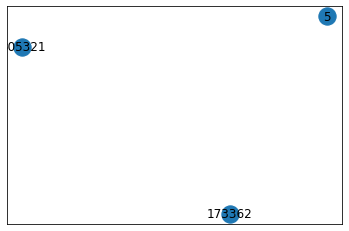

In [ ]:
nx.draw_networkx(H, with_labels = True,edge_color = 'r')

In [ ]:
#nx.write_gpickle(G, '/content/drive/MyDrive/GNN_datasets/G.gpickle')